# Data Visualization with Python

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/My Drive/Corizo/Class 4 Visualization/tips.csv')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.shape

(244, 7)

- The data has 244 rows and 7 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


- There are attributes of different types (*int*, *float*, *object*) in the data.

In [9]:
# df.describe()
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_bill,244.0,NaN,NaN,NaN,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,NaN,NaN,NaN,2.998279,1.383638,1.0,2.0,2.9,3.5625,10.0
sex,244,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,244,2,No,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,244,4,Sat,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,244,2,Dinner,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,244.0,NaN,NaN,NaN,2.569672,0.9511,1.0,2.0,2.0,3.0,6.0


## Histogram

- A **histogram** is a univariate plot which helps us understand the distribution of a continuous numerical variable.
- It breaks the range of the continuous variables into a intervals of equal length and then counts the number of observations in each interval.
- We will use the *histplot()* function of seaborn to create histograms.

<Axes: xlabel='tip', ylabel='Count'>

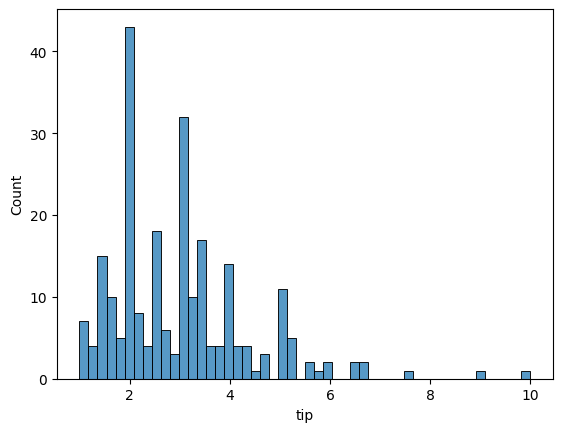

In [11]:
sns.histplot(data=df, x='tip', bins=50)

**We can specify the number of intervals (or groups or bins) to create by setting the *bins* parameter.**

- If not specified it is passed to [numpy.histogram_bin_edges()](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges)

<Axes: xlabel='tip', ylabel='Count'>

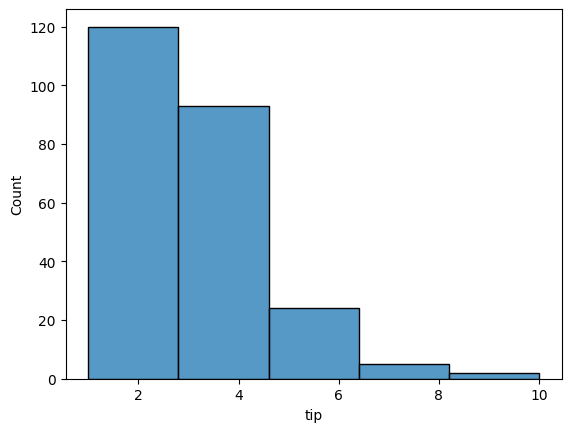

In [12]:
sns.histplot(data=df, x='tip', bins=5)

**In addition to the bars, we can also add a density estimate by setting the *kde* parameter to *True*.**

- **Kernel Density Estimation**, or **KDE**, visualizes the distribution of data over a continuous interval.
- The conventional scale for KDE is: **Total frequency of each bin × Probability**

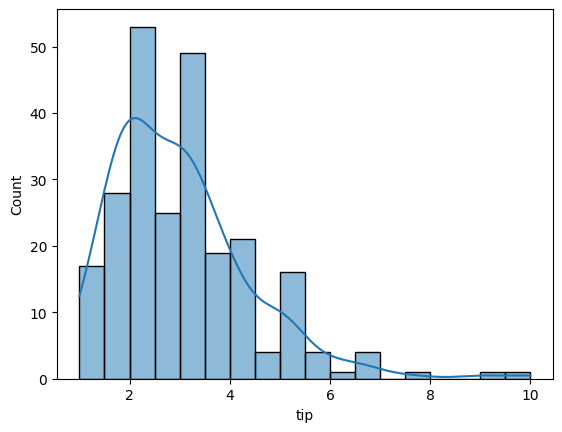

In [13]:
sns.histplot(data=df, x='tip', kde=True);

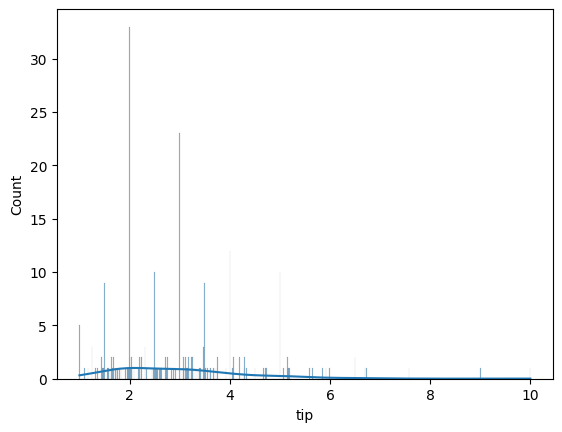

In [14]:
sns.histplot(data=df, x='tip', bins=700, kde=True);

Clearly, if we increase the number of bins, it reduces the frequency count in each group (bin). Since the scale of KDE depends on the total frequency of each bin (group), the above code gives us a flattened KDE plot.

**Let's check out the histograms for a few more attributes in the data.**

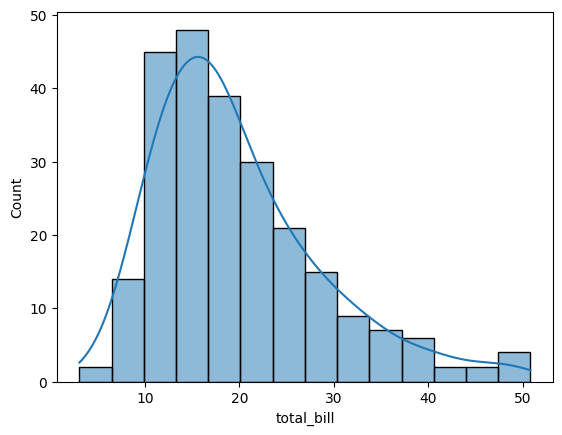

In [15]:
sns.histplot(data=df, x='total_bill', kde=True);

- A histogram is said to be **symmetric** if the left-hand and right-hand sides resemble mirror images of each other when the histogram is cut down the middle.

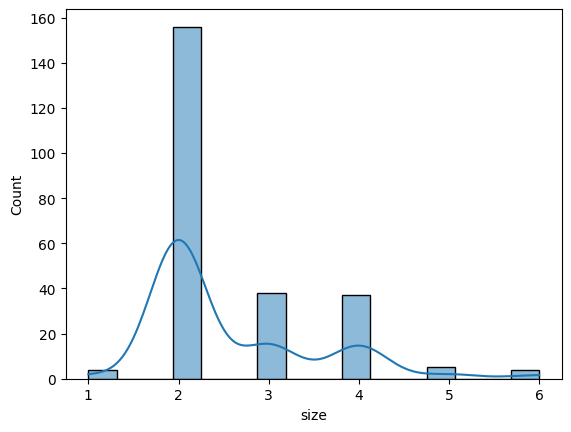

In [16]:
sns.histplot(data=df, x='size', kde=True);

- The tallest clusters of bars, i.e., peaks, in a histogram represent the **modes** of the data.
- A histogram **skewed to the right** has a large number of occurrences on the left side of the plot and a few on the right side of the plot.
- Similarly, a histogram **skewed to the left** has a large number of occurrences on the right side of the plot and few on the left side of the plot.

**Histograms are intuitive but it is hardly a good choice when we want to compare the distributions of several groups. For example,**

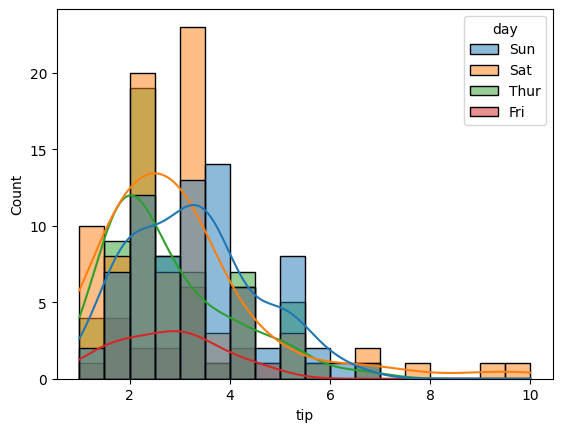

In [18]:
sns.histplot(data=df, x='tip', hue='day', kde=True);

It might be better to use subplots!

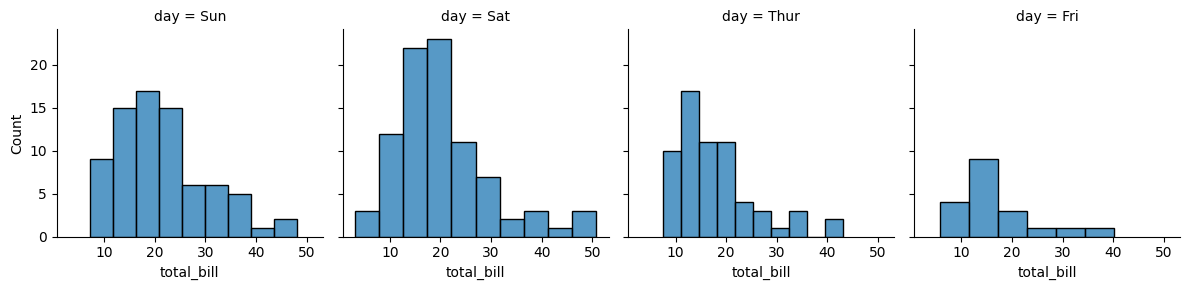

In [ ]:
g = sns.FacetGrid(df, col="day")
g.map(sns.histplot, "total_bill");

Boxplots, or box-and-whiskers plots, are an excellent way to visualize differences among groups.

## Boxplot

- A **boxplot**, or a **box-and-whisker plot**, shows the distribution of numerical data and skewness through displaying the data quartiles
- It is also called a **five-number summary plot**, where the five-number summary includes the minimum value, first quartile, median, third quartile, and the maximum value.
- The *boxplot()* function of seaborn can be used to create a boxplot.

<Axes: xlabel='tip', ylabel='Count'>

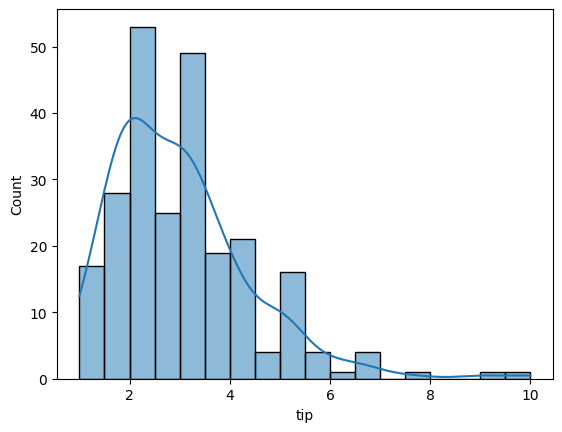

In [25]:
sns.histplot(data=df, x='tip', kde=True)

In [22]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

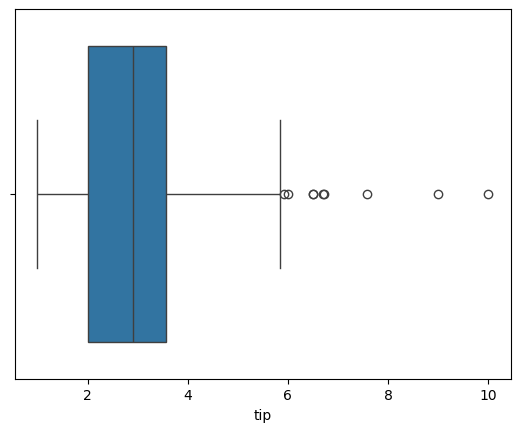

In [23]:
# creating a boxplot with seaborn
sns.boxplot(data=df, x='tip');
# IQR = Q3-Q1
# Lower whisker = Q1 - 1.5*IQR
# upper whisker = Q3 + 1.5*IQR

- In a boxplot, when the median is closer to the left of the box and the whisker is shorter on the left end of the box, we say that the distribution is **positively skewed (skewed right)**.
- Similarly, when the median is closer to the right of the box and the whisker is shorter on the right end of the box, we say that the distribution is **negatively skewed (skewed left)**.

**For example,**

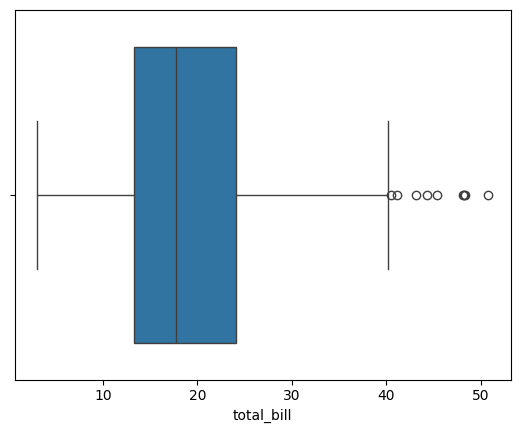

In [26]:
sns.boxplot(data=df, x='total_bill');

**Let's see how we can compare groups with boxplots.**

<Axes: ylabel='total_bill'>

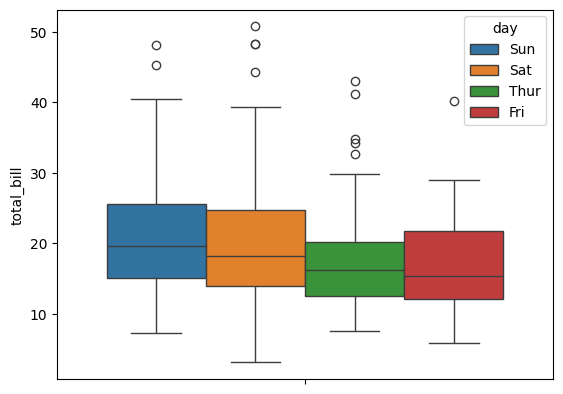

In [27]:
sns.boxplot(data=df, y='total_bill', hue='day')
# sns.boxplot(data=df, y='total_bill', x='day')

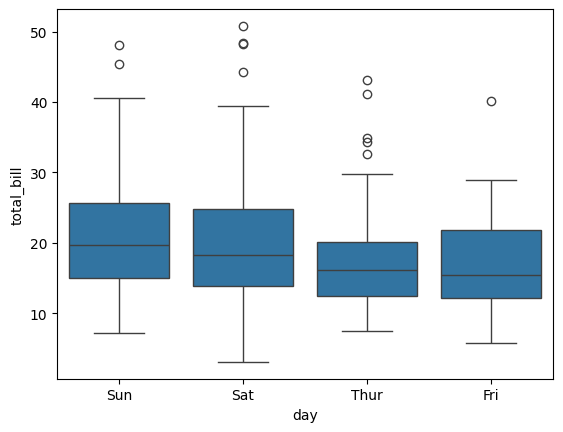

In [ ]:
sns.boxplot(data=df, x='day', y='total_bill') ;


**Though boxplot visually summarizes variation in large datasets, it is unable to show multimodality and clusters.**

## Bar Graph

- A bar graph is generally used to show the counts of observations in each bin (or level or group) of categorical variable using bars.
- We can use the *countplot()* function of seaborn to plot a bar graph.

In [ ]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

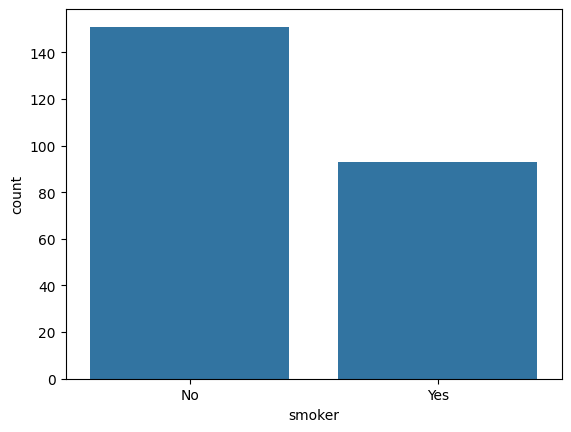

In [28]:
sns.countplot(data=df, x='smoker');

**We can also make the plot more granular by specifying the *hue* parameter to display counts for subgroups.**

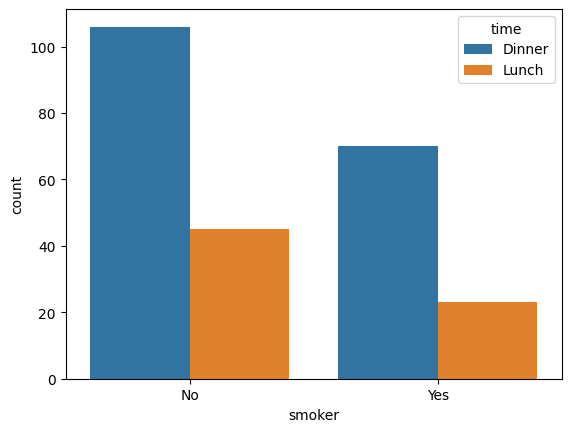

In [29]:
sns.countplot(data=df, x='smoker', hue='time');


## Customizing plots

- In this section we will see how we can customize  plots by using different matplotlib and seaborn functions.

To change the axis scales of a plot:

```
    plt.xlim(left, right)   # here left and right indicates the min and the max limits of  x-axis respectively
    plt.ylim(bottom, top)   # here bottom and top indicates the min and the max limits of  y-axis respectively
```

To change the plot title and axis labels:

```
    plt.title()
    plt.xlabel()   # for x_axis labels
    plt.ylabel()   # for y_axis labels
```

To show the grid lines of a plot:

```
    sns.set(style="darkgrid")
    sns.set(style="whitegrid")
    sns.set(style="white")
```

To hide the axes of a plot:

```
    plt.axis('off')   # it will hide both the x-axis and y-axis
```

To customize labels of the plot legend:

```
    ax.legend([])   # takes list of the legend values
```

To change the position of the plot legend:

```
    plt.legend(loc=___)
```

The following values can be added to *loc* to change the location of the legend:
- 'upper left', 'upper right', 'lower left', 'lower right', 'center', 'best', [etc.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

**Let's see how we can customize a histogram.**

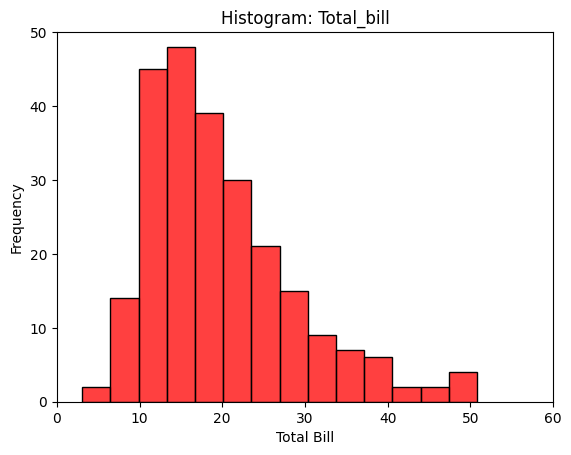

In [30]:
plt.title('Histogram: Total_bill')
plt.xlim(0,60)
plt.ylim(0,50)
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
sns.histplot(data=df, x='total_bill', color='red');

**Let's see how we can customize a boxplot**

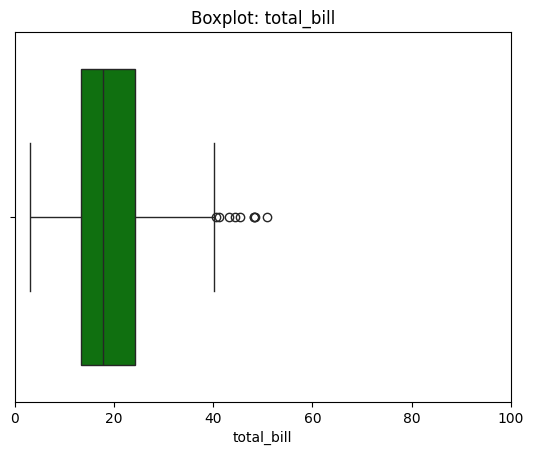

In [31]:
plt.title('Boxplot: total_bill')
plt.xlim(0,100)
plt.xlabel('total_bill')
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='total_bill', color='green');

## Lineplot

Suppose, your dataset has multiple y values for each x value.  A lineplot is a great way to visualize this.  This type of data often shows up when we have data that evolves over time, for example, when we have monthly data over several years.  If we want to compare the individual months, then a line plot is a great option.  This is sometimes called seasonality analysis.



- A **line plot** uses straight lines to connect individual data points to display a trend or pattern in the data.
    - For example, seasonal effects and large changes over time.

- The *lineplot()* function of seaborn, by default, aggregates over multiple y values at each value of x and uses an estimate of the central tendency for the plot.

- *lineplot()* assumes that you are most often trying to draw y as a function of x. So, by default, it sorts the data by the x values before plotting.

In [32]:
# loading one of the example datasets available in seaborn
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [33]:
flights[flights['month']=='Jan']

,year,month,passengers
0,1949,Jan,112
12,1950,Jan,115
24,1951,Jan,145
36,1952,Jan,171
48,1953,Jan,196
60,1954,Jan,204
72,1955,Jan,242
84,1956,Jan,284
96,1957,Jan,315
108,1958,Jan,340


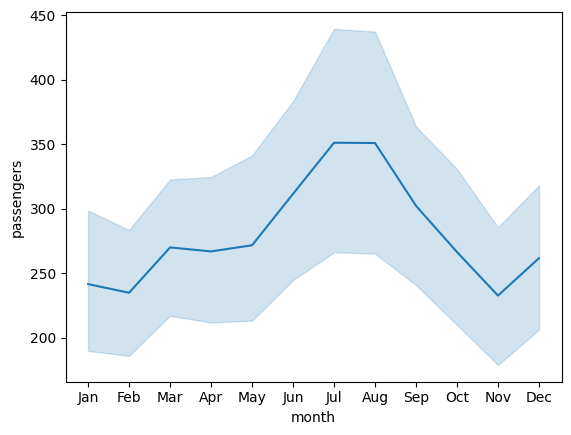

In [34]:
# loading one of the example datasets available in seaborn
# flights = sns.load_dataset("flights")

# creating a line plot
sns.lineplot(data = flights , x = 'month' , y = 'passengers');

- The light blue shaded area is actually the '**confidence interval**' of the y-value estimates for each x-axis value.

- The **confidence interval** is a range of values around that estimate that are believed to contain the true value of that estimate with a certain probability.

**We can switch off the confidence intervals by setting the *ci* parameter to *'False'*.**

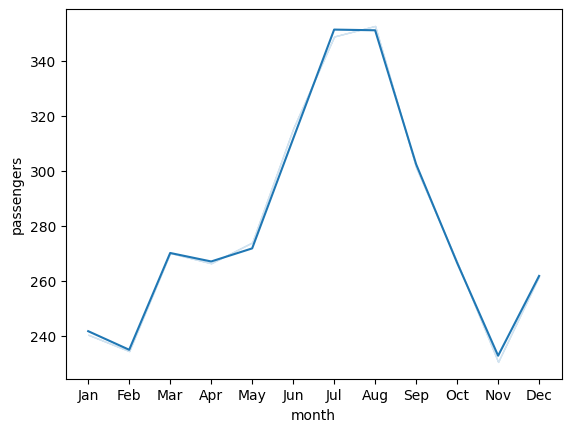

In [35]:
sns.lineplot(data=flights , x='month' , y='passengers', errorbar=('ci', False));

**We can also check the relationship between two variables for different categories by specifying the *hue* parameter.**

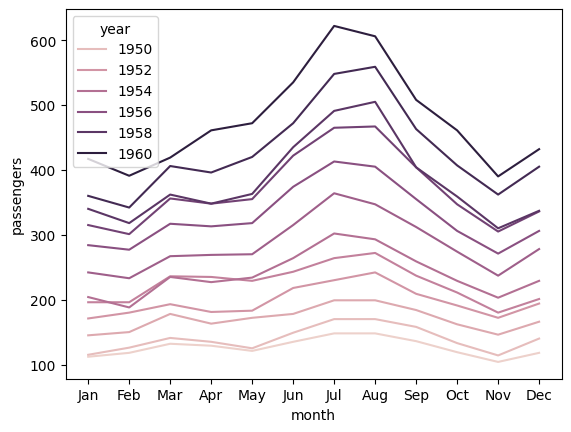

In [36]:
sns.lineplot(data=flights, x='month', y='passengers', errorbar=('ci', False), hue='year');

**We can change the style of the lines by adding 'style' parameter to the function.**

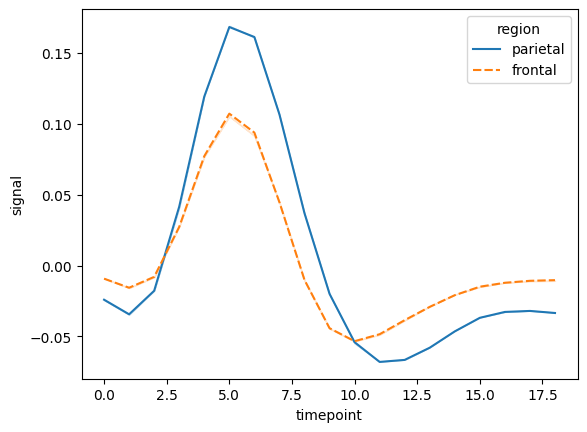

In [37]:
# loading one of the example datasets available in seaborn
fmri = sns.load_dataset("fmri")
# creating the line plot
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="region", style="region", errorbar=('ci', False));
# fmri.head(2)

**We can also add markers at each observation to identify groups in a better way.**

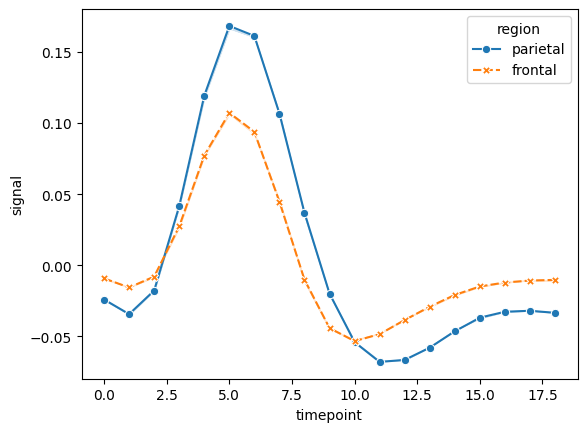

In [38]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="region", style="region", errorbar=('ci', False), markers=True);

**Let's customize the lineplot for a better visualization.**

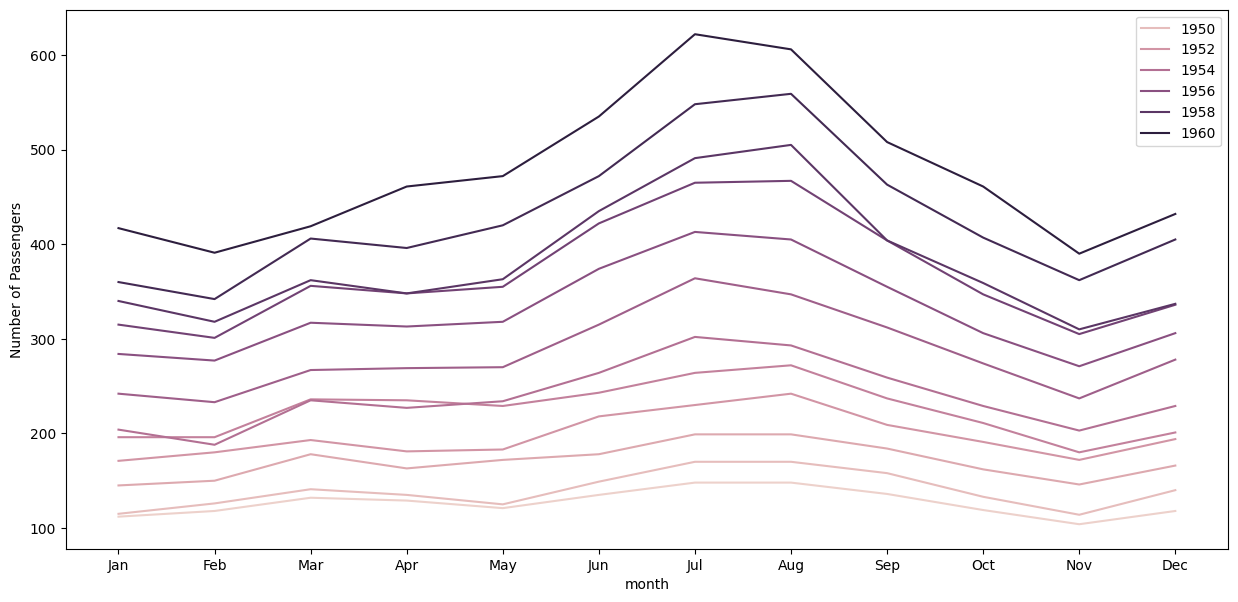

In [39]:
plt.figure(figsize = (15,7))
sns.lineplot(data = flights , x = 'month' , y = 'passengers', hue = 'year')
plt.ylabel('Number of Passengers')
plt.legend(bbox_to_anchor=[1, 1]); #another way to change the legend's location in the plot

- Note that, unlike barplots and histograms, line plots may not include a zero baseline.
- We create a line chart is to emphasize changes in value, rather than the magnitude of the values themselves, and hence, a zero line is not meaningful.

## Scatterplot

Sometimes we want to know if two variables mean something when put together, whether a small change in one variable affects the other variable. In such cases, plotting a **scatterplot**, or **scatter-diagram**, with our data points can help us to check whether there is a potential relationship between them.

- A **scatterplot** is the simplest mode of a diagrammatic representation of two variables.
- It takes two perpendicular axes of coordinates, one for x and one for y.
- Unlike the lineplot, it directly plots each pair of values as a point on the 2D space.
- The *scatterplot()* function of seaborn can be used to make a scatterplot.

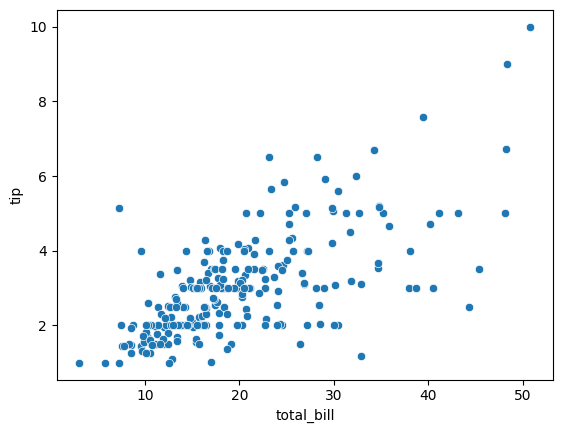

In [40]:
sns.scatterplot(data=df, x='total_bill', y='tip');

**We can also check the relationship between two variables for different categories by specifying the *hue* parameter.**

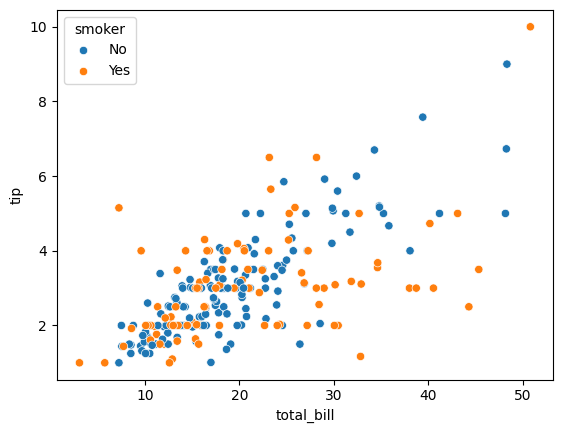

In [41]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='smoker');

**We can assign the same variable as *hue* to another parameter *style* which will vary the markers and create a more readable plot.**

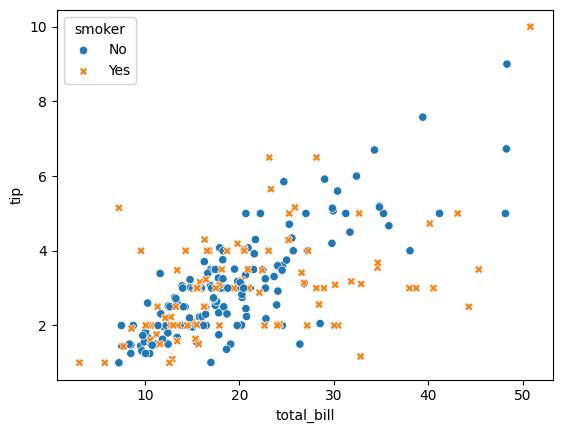

In [42]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='smoker', style='smoker');

**Correlation**

Correlation means association. More precisely, it expresses the extent to which two variables change together at a constant rate.

- In a scatter plot when the y variable tends to increase as the x variable increases, we say there is a **positive correlation** between the variables.
- Again, when the y variable tends to decrease as the x variable increases, we say there is a **negative correlation** between the variables.
- If the points on the scatter plot seem to be scattered randomly, we say that there is **no correlation** between the variables.

**Let's check out the relationship between a few more variables using scatter plots.**

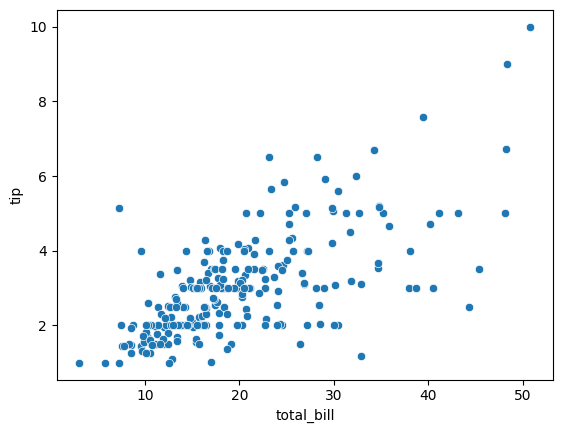

In [ ]:
sns.scatterplot(data=df, x='total_bill', y='tip');

From the above plot, we can say that these variables are *positively correlated.*

## lmplot

- The *lmplot()* function plots a scatterplot and also fit a linear model with a confidence interval for the fitted model.

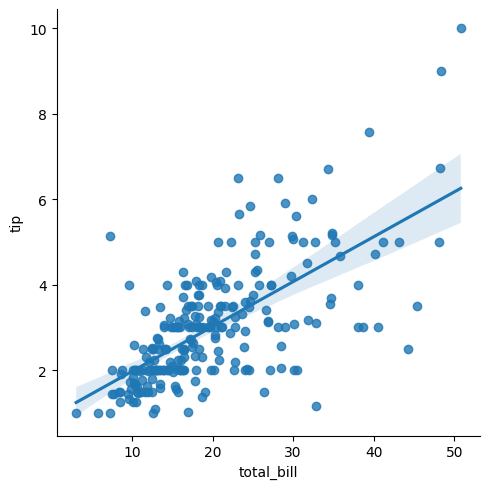

In [43]:
sns.lmplot(data=df, x='total_bill', y='tip');

**We can also check the relationship between two variables for different categories by specifying the *hue* parameter.**

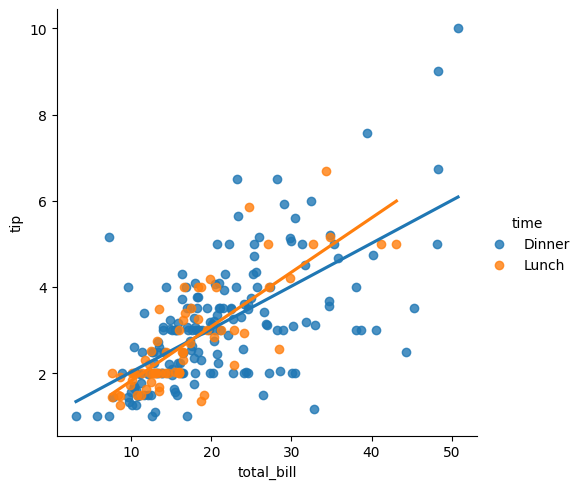

In [44]:
sns.lmplot(data=df, x='total_bill', y='tip', hue='time',ci=False);

**We can also disable the 95% confidence interval and just keep the regression model fit by setting the *ci* parameter to *False*.**

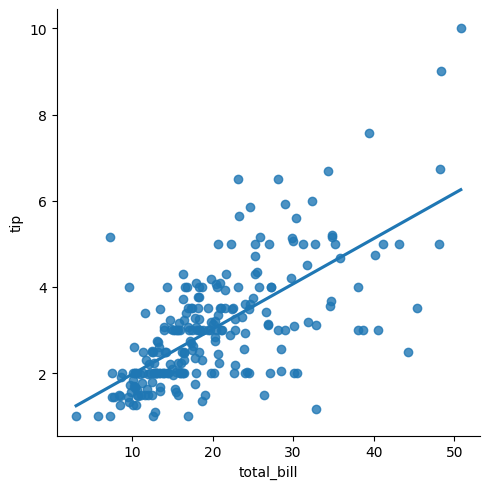

In [ ]:
sns.lmplot(data = df, x='total_bill', y='tip', ci=False);

**We can also plot the levels of the third variable across different plots.**

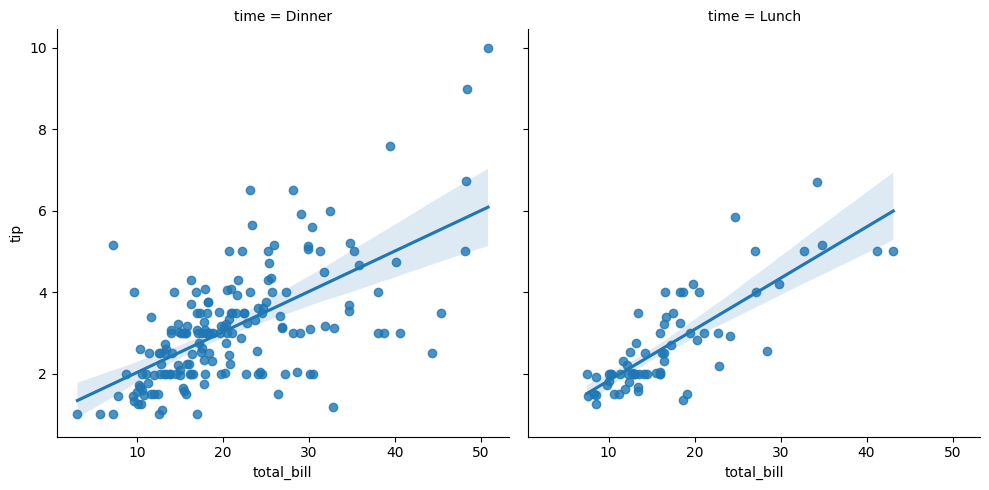

In [45]:
sns.lmplot(data=df, x='total_bill', y='tip', col='time');

We have seen that histograms help us understand the distribution of individual variables and scatterplots help us identify the relationship between two variables. While we can view and analyze these plots separately, having them together in a single visualization would allow us to capture a lot more information in a concise manner. That's where a **jointplot** comes to our aid.

## Joint plot

* A jointplot helps to quickly visualize the bivariate and univariate profiles on the same plot.
* It comprises three plots - one displays the relationship between two variables while the other two show the individual distribution of each variable in the margins.
* The *jointplot()* function of seaborn can be used to create a jointplot.

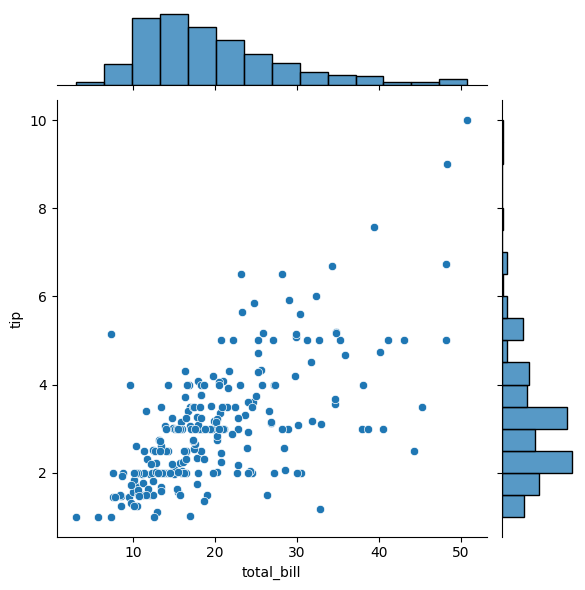

In [46]:
sns.jointplot(data=df, x='total_bill', y='tip');

- By default, *jointplot()* creates a scatter plot to show the relationship between two variables and individual histograms are created in x and y axis margins for each of the variables.

One of the drawbacks of **scatterplots** is the overlapping of points. When we have large volumes of data to plot, the data points in the plot overlap with each other, making it difficult to interpret the data.

In such cases, we can *divide the entire plot into bins using different shapes (square, triangle, hexagon, etc.)* and then try to see the number of data points falling within each of the bins.

seaborn's *jointplot()* provides a '**hex**' kind to plot the data in above-mentioned way.

**We can create a hexbin plot by setting *kind="hex"*.**

- It actually splits the plotting window into several hexagons and the colour of each hexagon denotes the number of data points in it.

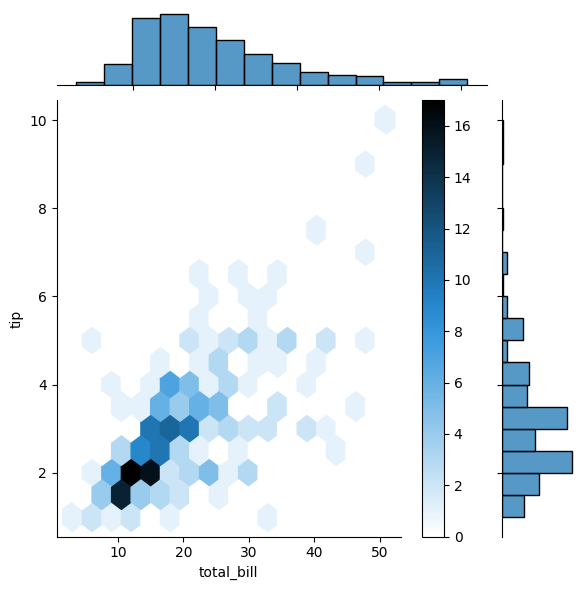

In [47]:
sns.jointplot(data=df, x='total_bill', y='tip', kind="hex");
plt.colorbar(); # adds a separate axis indicating the color scale in this plot

**We can also create a kde plot by setting *kind="kde"*.**.

- A KDE jointplot also uses color to determine where observations are the most dense.
- It creates a continuous plot using probabilities of new data should be introduced.

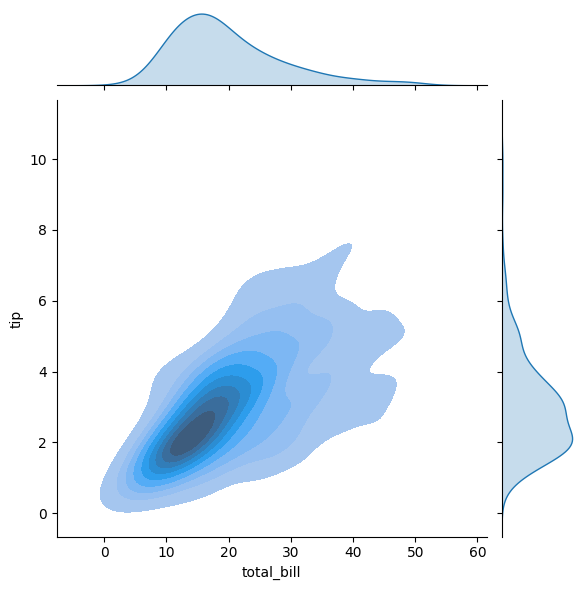

In [48]:
sns.jointplot(data=df, x='total_bill', y='tip', kind="kde", fill=True);

**Let's check out the joint plots for a few more attributes in the data.**
- By using **kind = "reg"**, we can use the joint point to find the best line or curve that fits the plot.

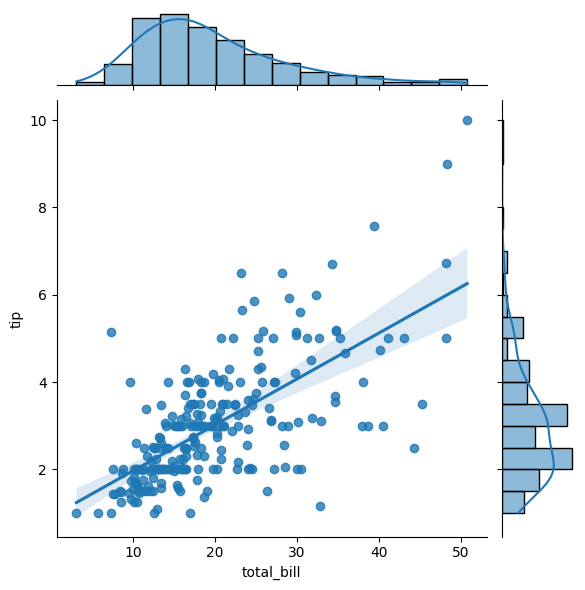

In [49]:
sns.jointplot(data=df, x='total_bill', y='tip', kind="reg");

## Violin Plot

* A **violin plot** allows us to visualize the distribution of a numeric variable for several groups.
* It is similar to **boxplot** but with a rotated plot on each side, giving more information about the density estimate on the y-axis.
* The *violinplot()* function of seaborn can be used to make a violin plot.

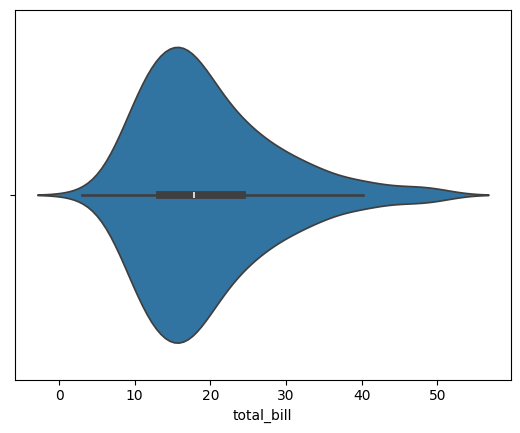

In [50]:
sns.violinplot(data=df, x='total_bill');

- The white dot in the plot represents the **median**.
- The thick gray bar in the center represents the **interquartile range**.
- The wider section of the violin plot represents a higher probability and the skinnier sections represent a lower probability for the given value.

**We can get a vertical plot by setting *orient* parameter to *'v'* and assigning a numeric variable to the y-axis.**

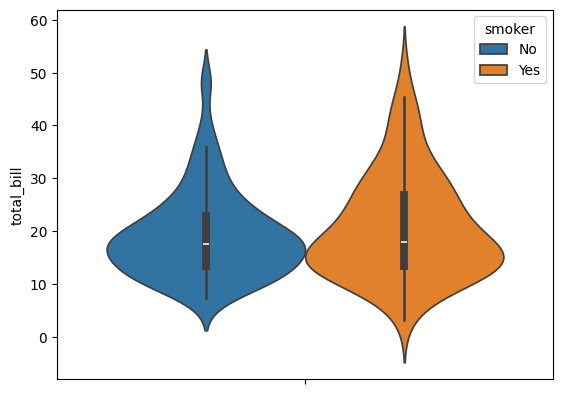

In [51]:
sns.violinplot(data=df, hue='smoker', y='total_bill', orient='v');

**We can use the *palette* parameter to change the colour palette.**

- seaborn has six variations of it - deep, muted, pastel, bright, dark, colorblind.

<ipython-input-52-6d5c864b4ca6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='day', y='total_bill', palette="bright");


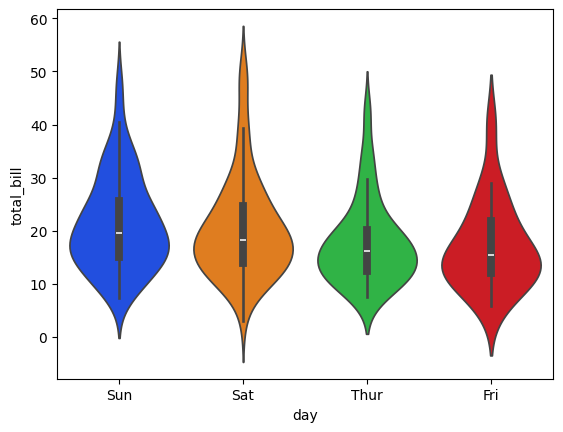

In [52]:
sns.violinplot(data=df, x='day', y='total_bill', palette="bright");

<ipython-input-53-8be7b5cbf425>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='day', y='total_bill', palette="colorblind");


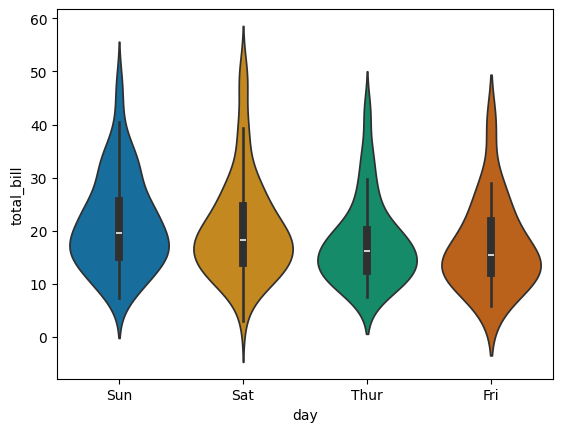

In [53]:
sns.violinplot(data=df, x='day', y='total_bill', palette="colorblind");

Histograms and other distribution plots are typically preferred for larger data sets. When we have a small dataset and we want to visualize the frequency distribution, a **strip plot** can be used.

## Strip Plot

* A strip plot is basically a scatter plot that differentiates different categories.
* The *stripplot()* function of seaborn can be used to make a strip plot.

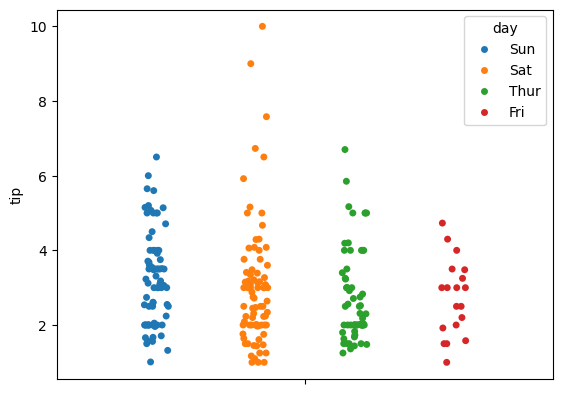

In [56]:
sns.stripplot(data=df, y='tip', hue='day', jitter=True, dodge=True);

Strip plots are considered a good alternative to a box plot or a violin plot for comparing data distributions when we have fewer data points.

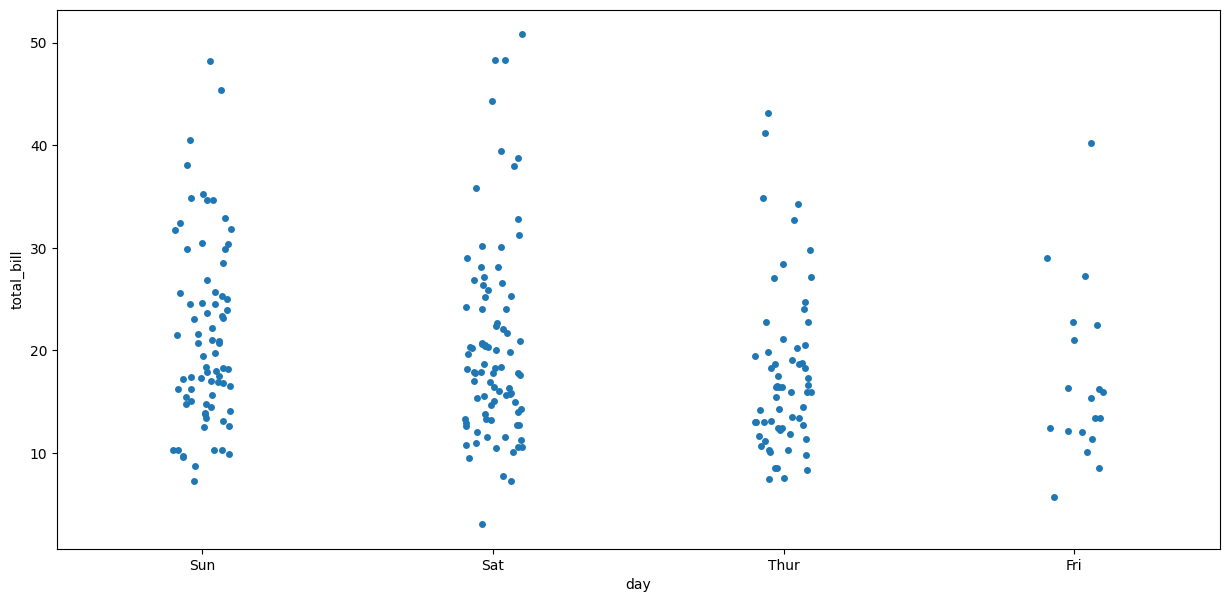

In [ ]:
plt.figure(figsize=(15,7))
sns.stripplot(data=df, x='day', y='total_bill');

**Strip plots are more useful when we add random noise called "jitter" to avoid overlapping of data points with same values.**

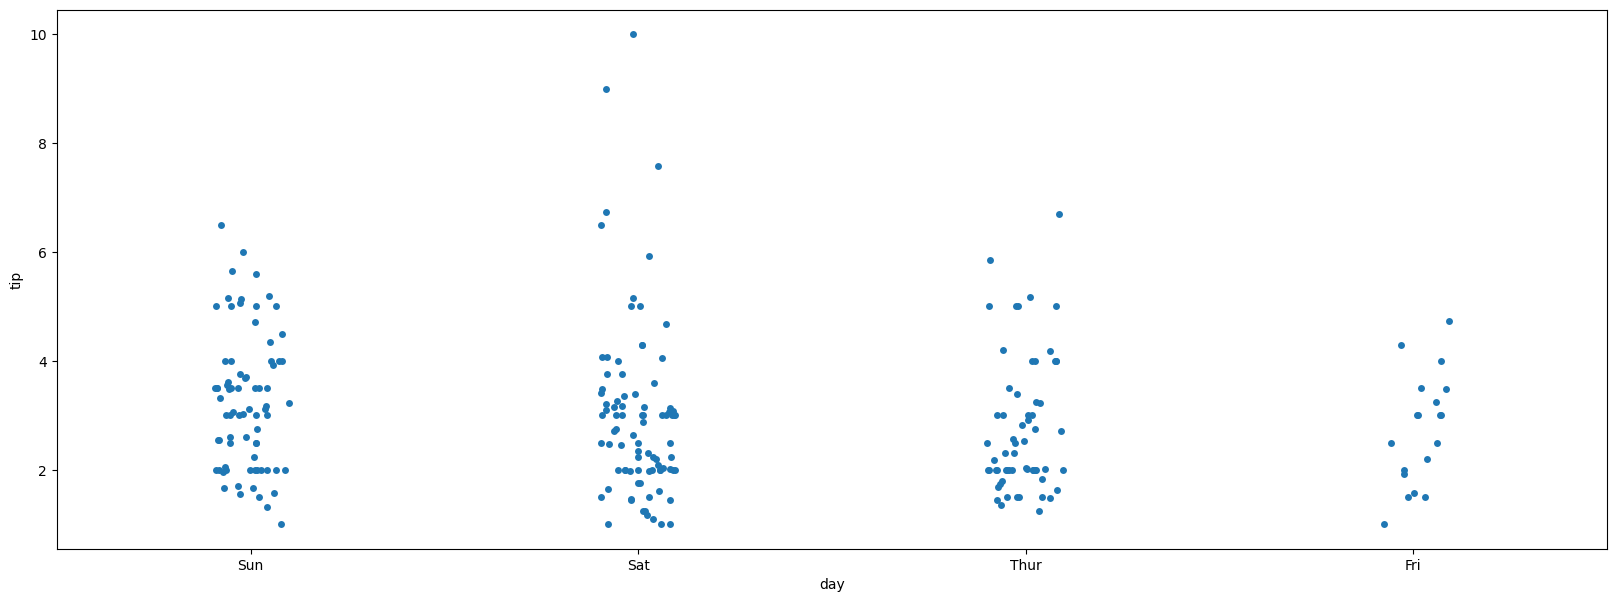

In [ ]:
plt.figure(figsize=(20,7))
sns.stripplot(data=df, x='day', y='tip', jitter=True);

**We can set the *hue* parameter to display observations for subgroups.**

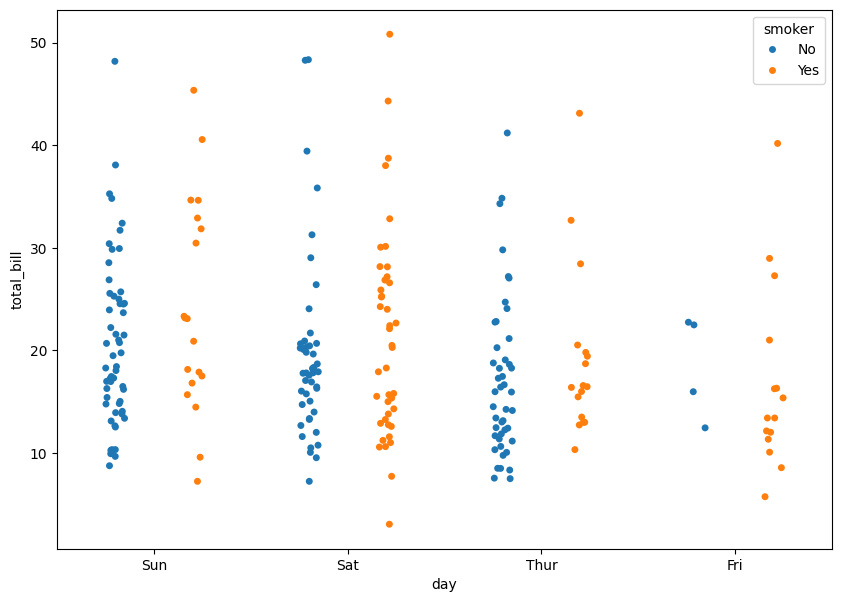

In [ ]:
plt.figure(figsize=(10,7))
sns.stripplot(data=df, x='day', y='total_bill', hue="smoker", jitter=True, dodge=True);

In a strip plot, dots are randomly arranged in vertical direction, which means we can not use the width to estimate distribution. This can be easily done by **swarm plots**.

## Swarm Plot

* A **swarm plot** is very similar to the strip plot, but it avoids the overlapping of points.
* The *swarmplot( )* function of seaborn can be used to create such a graph for categorical values.

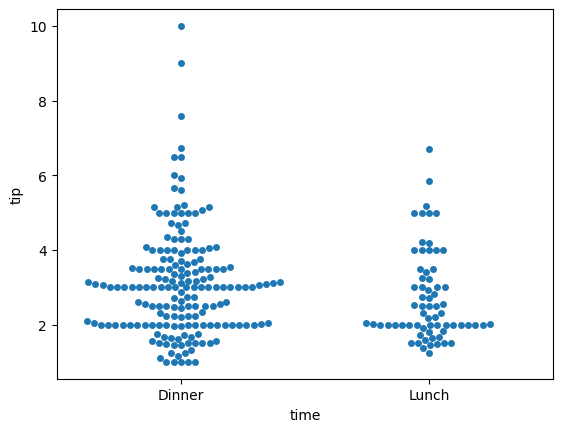

In [57]:
sns.swarmplot(data=df, x='time', y='tip');

- In a swarm plot, dots are arranged in vertical columns.
- So, we can estimate the distribution of our data by looking at the width of the plot.

**We can add the *hue* parameter to *swarmplot()* and separate the categories.**

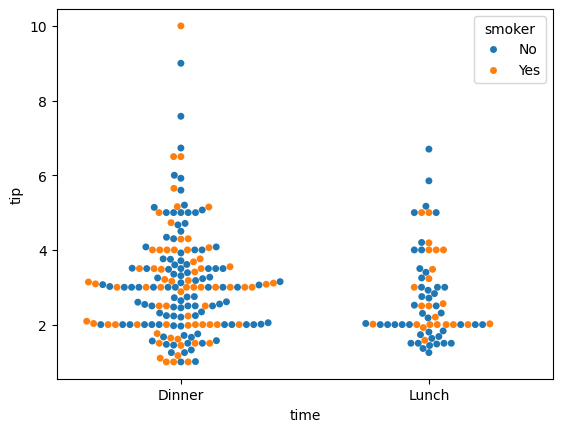

In [58]:
sns.swarmplot(data=df, x='time', y='tip', hue='smoker');

**We can split the two products setting the *dodge* argument to *True*.**

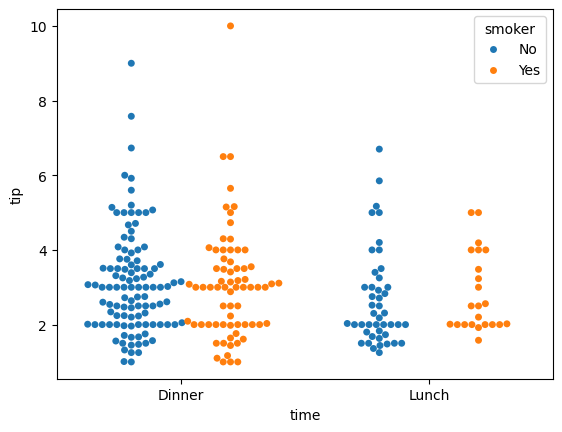

In [59]:
sns.swarmplot(data=df, x='time', y='tip', hue='smoker', dodge=True);

## Catplot

* The *catplot()* function provides a new framework giving access to several types of plots that show relationship between numerical variable and one or more categorical variables.
* Catplots supports 8 different plots including *stripplot()*, *swarmplot()*, *boxplot()* and more, with the default kind being 'strip'.

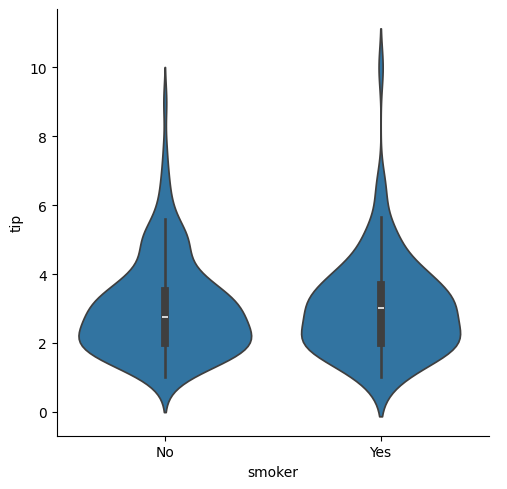

In [60]:
sns.catplot(data=df, x='smoker', y='tip', kind='violin');

**Catplot is very useful to draw categorical plots onto a FacetGrid by assigning a third variable to the *col* parameter.**

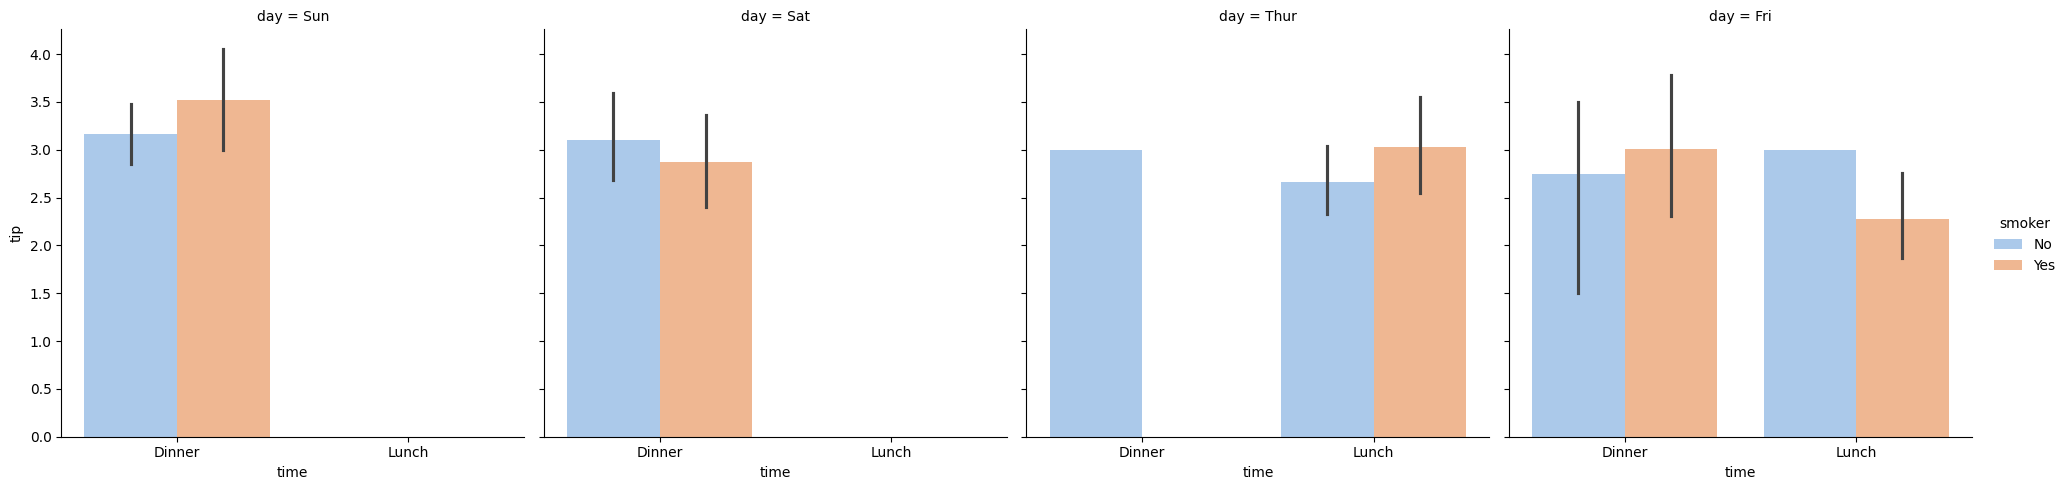

In [61]:
sns.catplot(data=df, x="time", y="tip", hue="smoker", col="day", kind='bar', palette='pastel');

## Pair Plot

* A **pairplot** shows the relationship between two numeric variables for each pair of columns in the dataset.
* It creates a grid of axes such that each variable in data will be shared in the y-axis across a single row and in the x-axis across a single column.
* The *pairplot()* function of seaborn can be used to create such a plot.

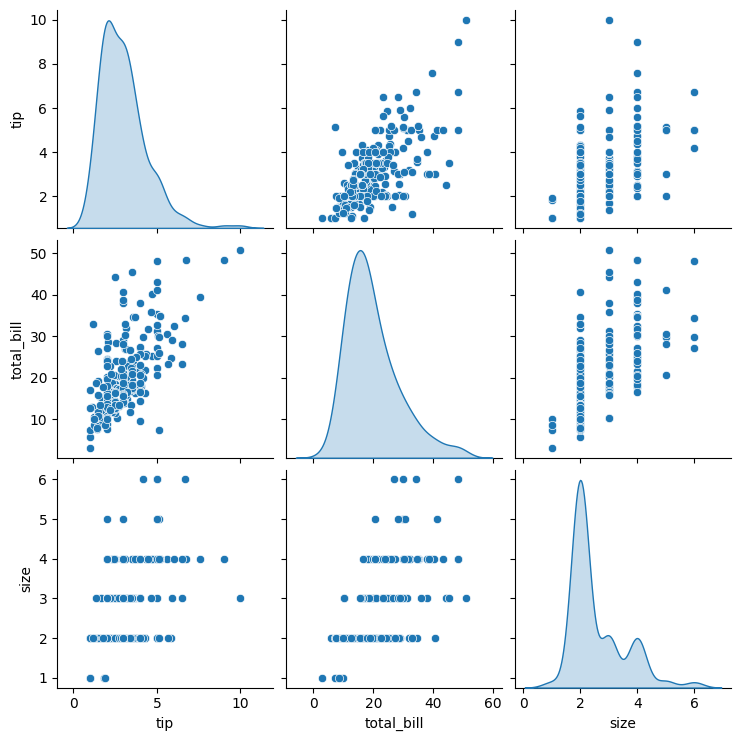

In [62]:
sns.pairplot(data=df[['tip','total_bill','size']], kind='scatter', diag_kind='kde')

**We can add the *hue* parameter in pairplot to create a semantic mapping.**

- It changes the default marginal plot to a layered kde plot.

**Also, we can add *vars* parameter to assign a list of variables from the dataset for which we want to create the pairplot.**

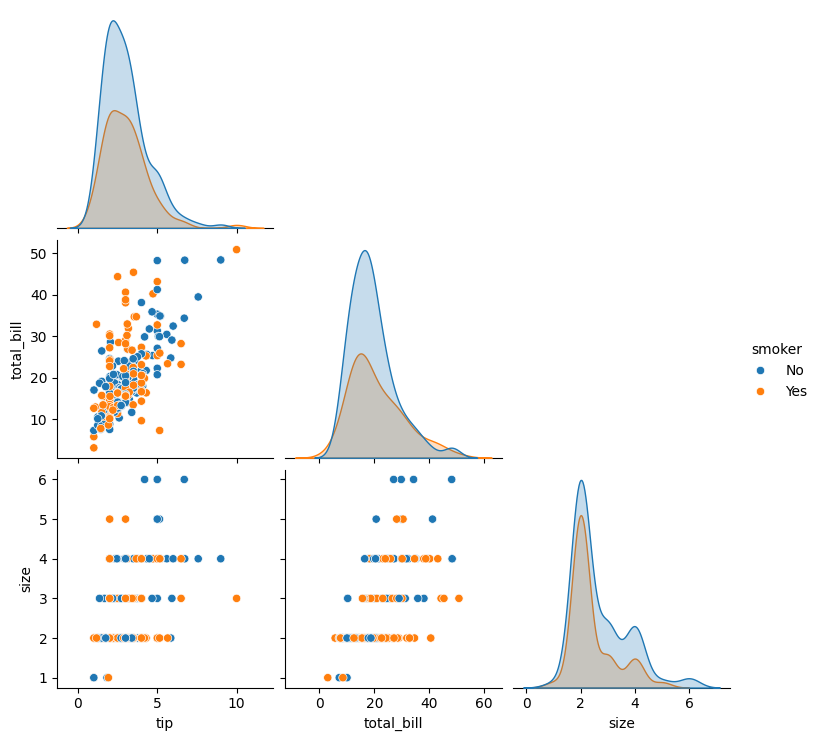

In [63]:
sns.pairplot(data=df, vars=['tip','total_bill','size'], hue='smoker', corner=True);
# corner=True

**We can set *corner=True* to plot only the lower triangle of a pairplot.**

## Heatmap

* A **heatmap** is a graphical representation of data as a color-encoded matrix.
* It is a great way of representing  the correlation for each pair of columns in the data.
* The *heatmap()* function of seaborn helps us to create such a plot.

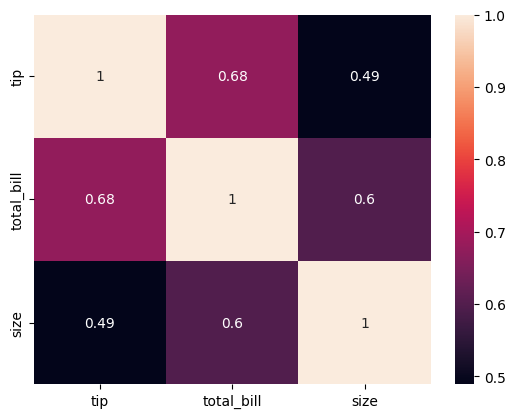

In [65]:
sns.heatmap(data=df[['tip','total_bill','size']].corr(), annot=True);

**We can set the *annot* parameter to *True* for displaying the numeric value in each cell.**

- To remove the color bar, the *cbar* parameter can be set to *False*.

**We can apply a different colormap with the *cmap* parameter for better visual appeal.**

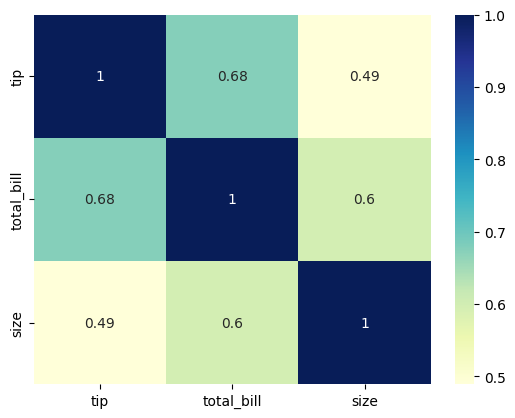

In [ ]:
sns.heatmap(data=df[['tip','total_bill','size']].corr(), annot=True, cmap='YlGnBu');

## Plotly

- **Plotly** is an open-source Python graphing library for building beautiful and interactive visualizations.

In [66]:
# let's start by installing plotly
!pip install plotly

In [67]:
# importing plotly
import plotly.express as px

### Histogram

In [68]:
his = px.histogram(df, x="tip")
his.show()

### Bar Plot

In [ ]:
bar = px.bar(df, x='total_bill', y='tip')
bar.show()

### Scatter Plot

In [69]:
scat = px.scatter(df, x='total_bill', y='tip')
scat.show()

### Boxplot with underlying data

In [70]:
fig = px.box(df, x="smoker", y="total_bill", points="all")
fig.show()

### 3D Scatter Plot

In [71]:
fig_3d = px.scatter_3d(df, x='time', y='total_bill', z='tip', color='day')
fig_3d.show()

In [ ]:
# to save the output to an HTML file
fig_3d.write_html("scatter_3d.html")

***